# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 2. Data Sourcing

In [3]:
raw_data = pd.read_csv('train.csv')

In [4]:
raw_data.shape

(1460, 81)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Dropping Id Column as pandas will automatically assign Id to each row

In [7]:
raw_data = raw_data.drop(columns=['Id'])

# 3. Pre-Defined Graph Functions

#### Bar Plot

In [8]:
def plot_bar_graph_from_series(data, plot_title, x_axis_label, y_axis_label, x_axis_label_rotation=0, y_axis_label_rotation=0, data_label_rotation='vertical'):
    graph = sns.barplot(x=data.index, y=data.values)
    plt.title(plot_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label, fontdict={'fontsize': 15})
    plt.ylabel(y_axis_label, fontdict={'fontsize': 15})
    graph.set_xticklabels(graph.get_xticklabels(), rotation=x_axis_label_rotation)
    graph.set_yticklabels(graph.get_yticklabels(), rotation=y_axis_label_rotation)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label_rotation)
    plt.show()

#### Box Plot

In [129]:
def plot_box_plot_from_series(data, plot_title, x_axis_label):
    plt.figure(figsize=(15, 5))
    sns.boxplot(data)
    plt.title(plot_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label, fontdict={'fontsize': 15})
    plt.show()

# 4. Data Cleaning

In [9]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 4.1 Dwelling Type (MSSubClass)

#### Identifying Null Values 

In [10]:
raw_data.MSSubClass.isna().sum()

0

In [11]:
ms_sub_df = raw_data.MSSubClass.value_counts(sort=False)

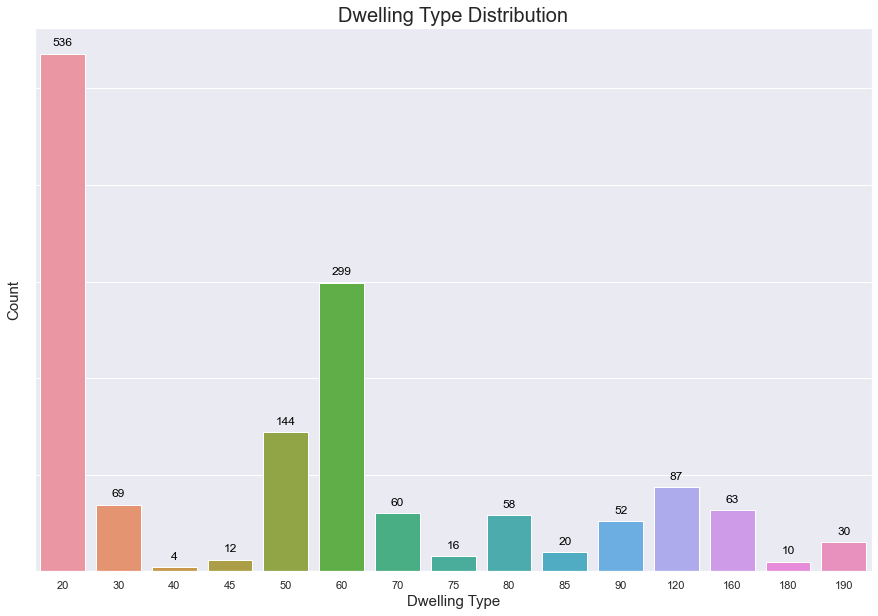

In [12]:
plot_bar_graph_from_series(data=ms_sub_df, plot_title='Dwelling Type Distribution', x_axis_label='Dwelling Type',
                           y_axis_label='Count', data_label_rotation='horizontal')

### 4.2 Zone Classification

In [13]:
raw_data.MSZoning.isna().sum()

0

In [14]:
ms_zone_df = raw_data.MSZoning.value_counts(sort=False)

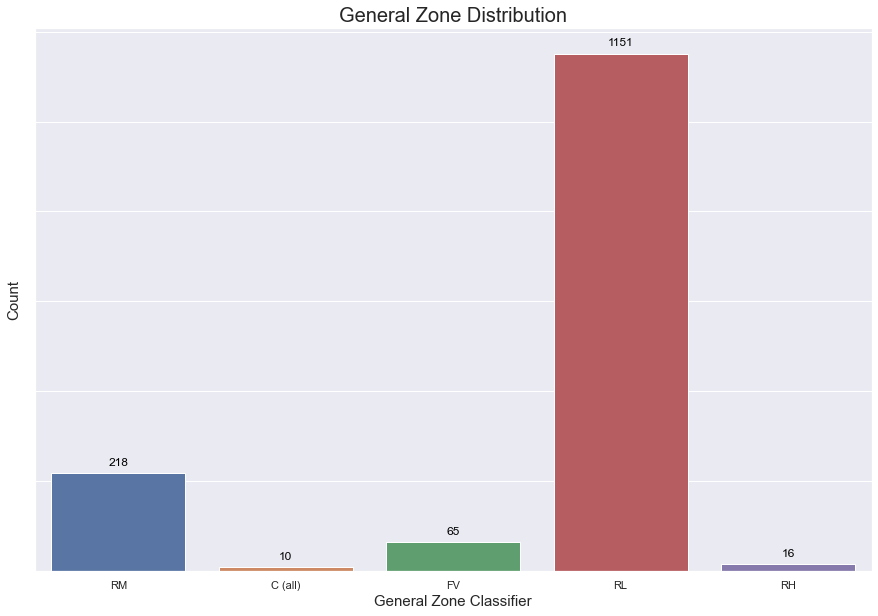

In [15]:
plot_bar_graph_from_series(data=ms_zone_df, plot_title='General Zone Distribution', x_axis_label='General Zone Classifier',
                           y_axis_label='Count', data_label_rotation='horizontal')

### 3.3 Lot Frontage (=========> Remaining <=========)

In [16]:
raw_data.LotFrontage.isna().sum()

259

### 3.4 Lot Area

In [17]:
raw_data.LotArea.isna().sum()

0

In [18]:
np.arange(0, 1.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [19]:
raw_data.LotArea.describe(percentiles=np.arange(0, 1.1, 0.1))

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
0%         1300.000000
10%        5000.000000
20%        7078.400000
30%        8063.700000
40%        8793.400000
50%        9478.500000
60%       10198.200000
70%       11066.500000
80%       12205.800000
90%       14381.700000
100%     215245.000000
max      215245.000000
Name: LotArea, dtype: float64

In [20]:
raw_data.LotArea[raw_data.LotArea < raw_data.LotArea.quantile(0.99)].count()

1445

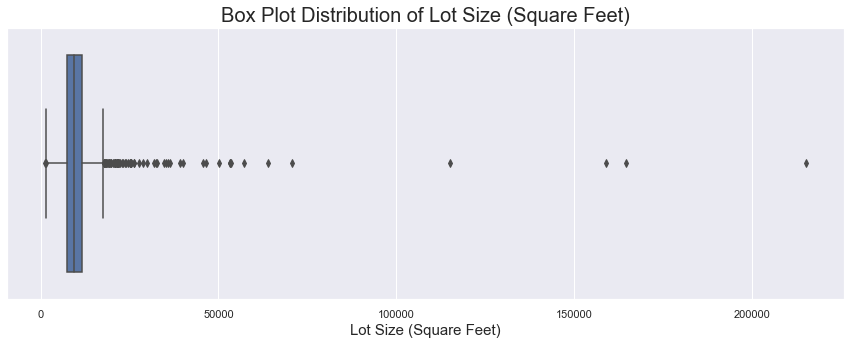

In [136]:
plot_box_plot_from_series(data=raw_data.LotArea,
                          plot_title='Box Plot Distribution of Lot Size (Square Feet)', 
                          x_axis_label='Lot Size (Square Feet)')

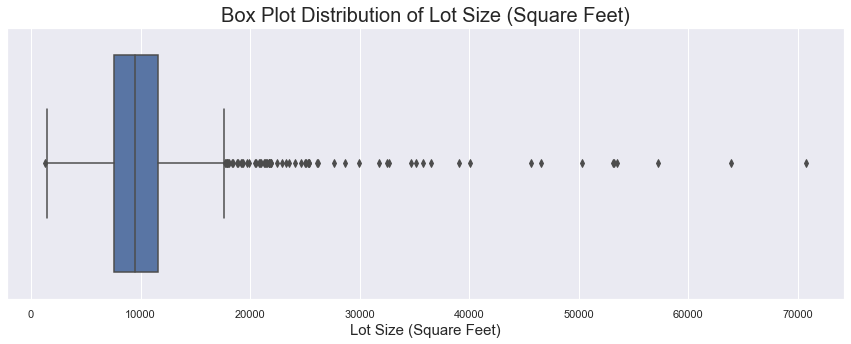

In [137]:
plot_box_plot_from_series(data=raw_data.LotArea[raw_data.LotArea < 100000],
                          plot_title='Box Plot Distribution of Lot Size (Square Feet)', 
                          x_axis_label='Lot Size (Square Feet)')

### 3.5 Street

In [23]:
street_df = raw_data.Street.value_counts(sort=False)
street_df

Grvl       6
Pave    1454
Name: Street, dtype: int64

In [24]:
raw_data.Street = raw_data.Street.map({'Grvl': 0, 'Pave': 1})

In [25]:
raw_data.Street.value_counts(sort=False)

0       6
1    1454
Name: Street, dtype: int64

### 3.6 Alley

In [26]:
alley_df = raw_data.Alley.value_counts(sort=False)
alley_df

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [27]:
round(raw_data.Alley.isna().sum() / len(raw_data.Alley) * 100, 2)

93.77

#### More than 90% of value are missing. We shall be dropping this column.

In [28]:
raw_data = raw_data.drop(columns=['Alley'])

### 3.7 Lot Shape

In [29]:
lot_shape_df = raw_data.LotShape.value_counts(sort=False)
lot_shape_df

IR2     41
Reg    925
IR3     10
IR1    484
Name: LotShape, dtype: int64

In [30]:
raw_data.LotShape = raw_data.LotShape.map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})

In [31]:
raw_data.LotShape.value_counts(sort=False)

0     10
1     41
2    484
3    925
Name: LotShape, dtype: int64

### 3.8 Land Contour

In [32]:
land_cont_df = raw_data.LandContour.value_counts(sort=False)
land_cont_df

HLS      50
Low      36
Lvl    1311
Bnk      63
Name: LandContour, dtype: int64

In [33]:
raw_data.LandContour = raw_data.LandContour.map({'Low': 0, 'HLS': 1, 'Bnk': 2, 'Lvl': 3})

In [34]:
raw_data.LandContour.value_counts(sort=False)

0      36
1      50
2      63
3    1311
Name: LandContour, dtype: int64

### 3.9 Utiltities

In [35]:
utility_df = raw_data.Utilities.value_counts(sort=False)
utility_df

NoSeWa       1
AllPub    1459
Name: Utilities, dtype: int64

In [36]:
raw_data.Utilities = raw_data.Utilities.map({'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3})

In [37]:
raw_data.Utilities.value_counts(sort=False)

1       1
3    1459
Name: Utilities, dtype: int64

### 3.10 Lot Configuration

In [38]:
lot_config_df = raw_data.LotConfig.value_counts(sort=False)
lot_config_df

Inside     1052
FR3           4
CulDSac      94
Corner      263
FR2          47
Name: LotConfig, dtype: int64

### 3.11 Land Slope

In [39]:
land_slope_df = raw_data.LandSlope.value_counts(sort=False)
land_slope_df

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [40]:
raw_data.LandSlope = raw_data.LandSlope.map({'Sev': 0, 'Mod': 1, 'Gtl': 2})

In [41]:
raw_data.LandSlope.value_counts(sort=False)

0      13
1      65
2    1382
Name: LandSlope, dtype: int64

### 3.12 Neighbourhood

In [42]:
neighbourhood_df = raw_data.Neighborhood.value_counts(sort=False)
neighbourhood_df

BrDale      16
BrkSide     58
CollgCr    150
IDOTRR      37
Blmngtn     17
Veenker     11
SawyerW     59
NoRidge     41
NWAmes      73
OldTown    113
Timber      38
Mitchel     49
NridgHt     77
Edwards    100
Gilbert     79
StoneBr     25
ClearCr     28
NPkVill      9
MeadowV     17
Sawyer      74
SWISU       25
Blueste      2
NAmes      225
Crawfor     51
Somerst     86
Name: Neighborhood, dtype: int64

### 3.13 Condition 1

In [43]:
raw_data.Condition1.isna().sum()

0

In [44]:
condition_1_df = raw_data.Condition1.value_counts(sort=False)
condition_1_df

RRNe         2
Norm      1260
PosN        19
PosA         8
RRAe        11
RRNn         5
RRAn        26
Feedr       81
Artery      48
Name: Condition1, dtype: int64

### 3.14 Condition 2

In [45]:
raw_data.Condition2.isna().sum()

0

In [46]:
condition_2_df = raw_data.Condition2.value_counts(sort=False)
condition_2_df

Norm      1445
PosN         2
PosA         1
RRAe         1
RRNn         2
RRAn         1
Feedr        6
Artery       2
Name: Condition2, dtype: int64

### 3.15 Building Type

In [47]:
raw_data.BldgType.isna().sum()

0

In [48]:
building_type_df = raw_data.BldgType.value_counts(sort=False)
building_type_df

1Fam      1220
Twnhs       43
2fmCon      31
Duplex      52
TwnhsE     114
Name: BldgType, dtype: int64

### 3.16 House Style

In [49]:
raw_data.HouseStyle.isna().sum()

0

In [50]:
housing_style_df = raw_data.HouseStyle.value_counts(sort=False)
housing_style_df

1Story    726
2.5Fin      8
2.5Unf     11
SLvl       65
SFoyer     37
1.5Unf     14
2Story    445
1.5Fin    154
Name: HouseStyle, dtype: int64

### 3.17 Overall Quality

In [51]:
raw_data.OverallQual.isna().sum()

0

In [52]:
overall_quality_df = raw_data.OverallQual.value_counts(sort=False)
overall_quality_df

1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: OverallQual, dtype: int64

### 3.18 Overall Condition

In [53]:
raw_data.OverallCond.isna().sum()

0

In [54]:
overall_cond_df = raw_data.OverallCond.value_counts(sort=False)
overall_cond_df

1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
Name: OverallCond, dtype: int64

### 3.19 Year Built

In [55]:
raw_data.YearBuilt.isna().sum()

0

In [56]:
year_df = raw_data.YearBuilt.value_counts(sort=False)
year_df

1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Name: YearBuilt, Length: 112, dtype: int64

### 3.20 Remodel Year

In [57]:
raw_data.YearRemodAdd.isna().sum()

0

In [58]:
remodel_year_df = raw_data.YearRemodAdd.value_counts(sort=False)
remodel_year_df

1950    178
1951      4
1952      5
1953     10
1954     14
       ... 
2006     97
2007     76
2008     40
2009     23
2010      6
Name: YearRemodAdd, Length: 61, dtype: int64

### 3.21 Roof Style

In [59]:
raw_data.RoofStyle.isna().sum()

0

In [60]:
roof_style_df = raw_data.RoofStyle.value_counts(sort=False)
roof_style_df

Gable      1141
Mansard       7
Hip         286
Flat         13
Gambrel      11
Shed          2
Name: RoofStyle, dtype: int64

### 3.22 Roof Material

In [61]:
raw_data.RoofMatl.isna().sum()

0

In [62]:
roof_mat_df = raw_data.RoofMatl.value_counts(sort=False)
roof_mat_df

Tar&Grv      11
WdShngl       6
Roll          1
ClyTile       1
Membran       1
CompShg    1434
Metal         1
WdShake       5
Name: RoofMatl, dtype: int64

### 3.23 Exterior covering on house (Exterior1st)

In [63]:
raw_data.Exterior1st.isna().sum()

0

In [64]:
ext1_df = raw_data.Exterior1st.value_counts(sort=False)
ext1_df

CBlock       1
BrkComm      2
CemntBd     61
Stone        2
AsphShn      1
WdShing     26
ImStucc      1
Stucco      25
Plywood    108
HdBoard    222
AsbShng     20
MetalSd    220
VinylSd    515
BrkFace     50
Wd Sdng    206
Name: Exterior1st, dtype: int64

### 3.24 Exterior covering on house - If more tahn 1 Material (Exterior2nd)

In [65]:
raw_data.Exterior2nd.isna().sum()

0

In [66]:
ext2_df = raw_data.Exterior2nd.value_counts(sort=False)
ext2_df

CBlock       1
Stone        5
Brk Cmn      7
AsphShn      3
Wd Shng     38
ImStucc     10
Stucco      26
CmentBd     60
Plywood    142
Other        1
HdBoard    207
AsbShng     20
MetalSd    214
VinylSd    504
BrkFace     25
Wd Sdng    197
Name: Exterior2nd, dtype: int64

### 3.25 Masonry veneer type (MasVnrType)

In [67]:
raw_data.MasVnrType.isna().sum()

8

In [68]:
mas_vnr_type_df = raw_data.MasVnrType.value_counts(sort=False)
mas_vnr_type_df

None       864
Stone      128
BrkCmn      15
BrkFace    445
Name: MasVnrType, dtype: int64

### 3.26 Masonry veneer area

In [69]:
raw_data.MasVnrArea.isna().sum()

8

In [70]:
mas_ven_df = raw_data.MasVnrArea.value_counts(sort=False)
mas_ven_df

196.0      4
0.0      861
186.0      3
240.0      3
212.0      2
        ... 
630.0      1
425.0      2
423.0      2
567.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

### 3.27 Exterior Material Quality

In [71]:
raw_data.ExterQual.isna().sum()

0

In [72]:
ext_qua_df = raw_data.ExterQual.value_counts(sort=False)
ext_qua_df

Gd    488
Fa     14
TA    906
Ex     52
Name: ExterQual, dtype: int64

In [73]:
raw_data.ExterQual = raw_data.ExterQual.map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [74]:
raw_data.ExterQual.value_counts(sort=False)

1     14
2    906
3    488
4     52
Name: ExterQual, dtype: int64

## 3.28 Exterior Material Present Quality

In [75]:
raw_data.ExterCond.isna().sum()

0

In [76]:
ext_qua_p_df = raw_data.ExterCond.value_counts(sort=False)
ext_qua_p_df

Po       1
Gd     146
Fa      28
TA    1282
Ex       3
Name: ExterCond, dtype: int64

In [77]:
raw_data.ExterCond = raw_data.ExterCond.map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [78]:
raw_data.ExterCond.value_counts(sort=False)

0       1
1      28
2    1282
3     146
4       3
Name: ExterCond, dtype: int64

### 3.29 Foundation Type

In [79]:
raw_data.Foundation.isna().sum()

0

In [80]:
found_type_df = raw_data.Foundation.value_counts(sort=False)
found_type_df

Wood        3
CBlock    634
BrkTil    146
Stone       6
Slab       24
PConc     647
Name: Foundation, dtype: int64

### 3.30 Basement Quality

In [81]:
raw_data.BsmtQual.isna().sum()

37

In [82]:
base_qual_df = raw_data.BsmtQual.value_counts(sort=False)
base_qual_df

Gd    618
Fa     35
TA    649
Ex    121
Name: BsmtQual, dtype: int64

#### Null values on this column are actually the apartments with no basement. So we will map these null values to 0 (least value)

In [83]:
raw_data.BsmtQual = raw_data.BsmtQual.map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [84]:
raw_data.BsmtQual.value_counts(sort=False)

0     37
2     35
3    649
4    618
5    121
Name: BsmtQual, dtype: int64

### 3.31 Basement Condition

In [85]:
raw_data.BsmtCond.isna().sum()

37

In [86]:
base_cond_df = raw_data.BsmtCond.value_counts(sort=False)
base_cond_df

Po       2
Gd      65
Fa      45
TA    1311
Name: BsmtCond, dtype: int64

#### Null values on this column are actually the apartments with no basement. So we will map these null values to 0 (least value)

In [87]:
raw_data.BsmtCond = raw_data.BsmtCond.map({np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [88]:
raw_data.BsmtCond.value_counts(sort=False)

0      37
1       2
2      45
3    1311
4      65
Name: BsmtCond, dtype: int64

### 3.32 Basement Exposure

In [89]:
raw_data.BsmtExposure.isna().sum()

38

In [90]:
base_exp_df = raw_data.BsmtExposure.value_counts(sort=False)
base_exp_df

Mn    114
No    953
Av    221
Gd    134
Name: BsmtExposure, dtype: int64

In [91]:
raw_data.BsmtExposure = raw_data.BsmtExposure.map({np.nan: 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})

In [92]:
raw_data.BsmtExposure.value_counts(sort=False)

0     38
1    953
2    114
3    221
4    134
Name: BsmtExposure, dtype: int64

### 3.33 Basement Finished Area Ratings

In [93]:
raw_data.BsmtFinType1.isna().sum()

37

In [94]:
base_fin_df = raw_data.BsmtFinType1.value_counts(sort=False)
base_fin_df

LwQ     74
Rec    133
GLQ    418
Unf    430
ALQ    220
BLQ    148
Name: BsmtFinType1, dtype: int64

In [95]:
raw_data.BsmtFinType1 = raw_data.BsmtFinType1.map({np.nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

In [96]:
raw_data.BsmtFinType1.value_counts(sort=False)

0     37
1    430
2     74
3    133
4    148
5    220
6    418
Name: BsmtFinType1, dtype: int64

### 3.34 Type 1 finished square feet

In [97]:
raw_data.BsmtFinSF1.isna().sum()

0

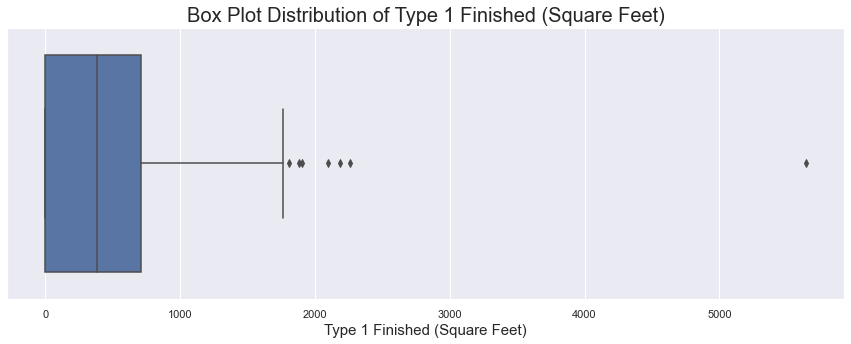

In [135]:
plot_box_plot_from_series(data=raw_data.BsmtFinSF1,
                          plot_title='Box Plot Distribution of Type 1 Finished (Square Feet)', 
                          x_axis_label='Type 1 Finished (Square Feet)')

### 3.35 Basement Finished Area Ratings (if multiple types)

In [99]:
raw_data.BsmtFinType2.isna().sum()

38

In [100]:
base_fin_2_df = raw_data.BsmtFinType2.value_counts(sort=False)
base_fin_2_df

LwQ      46
Rec      54
GLQ      14
Unf    1256
ALQ      19
BLQ      33
Name: BsmtFinType2, dtype: int64

In [101]:
raw_data.BsmtFinType2 = raw_data.BsmtFinType2.map({np.nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

In [102]:
raw_data.BsmtFinType2.value_counts(sort=False)

0      38
1    1256
2      46
3      54
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64

### 3.36 Type 2 Finished (Square feet)

In [103]:
raw_data.BsmtFinSF2.isna().sum()

0

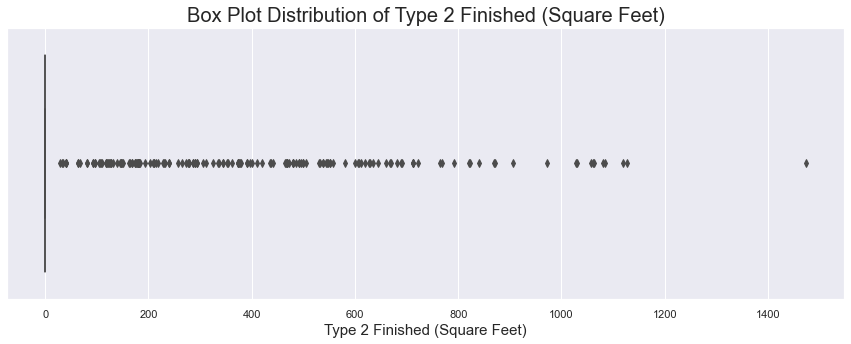

In [134]:
plot_box_plot_from_series(data=raw_data.BsmtFinSF2,
                          plot_title='Box Plot Distribution of Type 2 Finished (Square Feet)', 
                          x_axis_label='Type 2 Finished (Square Feet)')

### 3.37 Unfinished Square Feet of Basement Area

In [105]:
raw_data.BsmtUnfSF.isna().sum()

0

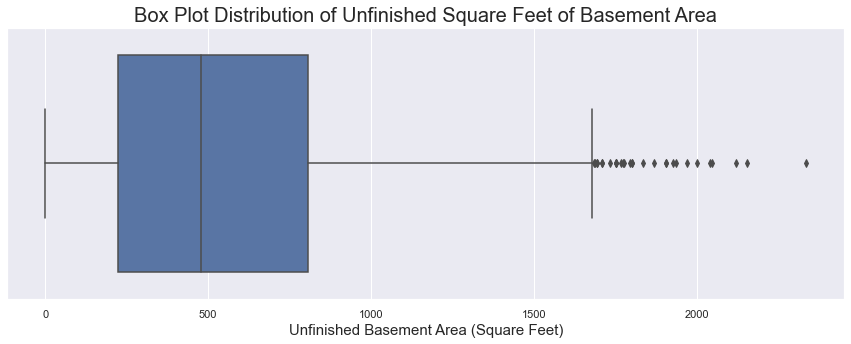

In [133]:
plot_box_plot_from_series(data=raw_data.BsmtUnfSF,
                          plot_title='Box Plot Distribution of Unfinished Square Feet of Basement Area', 
                          x_axis_label='Unfinished Basement Area (Square Feet)')

### 3.38 Total Square Feet of Basement Area

In [107]:
raw_data.TotalBsmtSF.isna().sum()

0

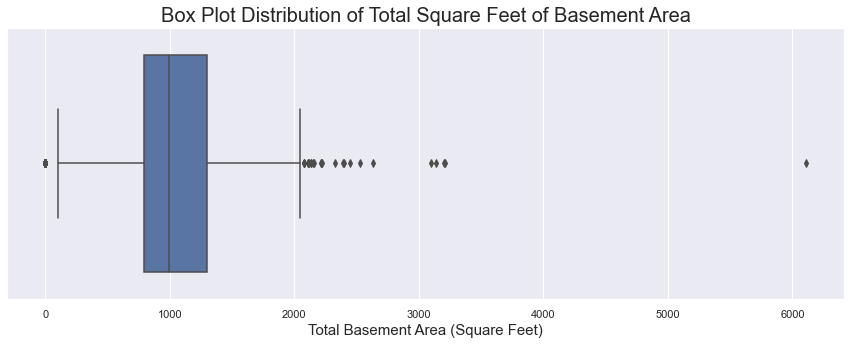

In [132]:
plot_box_plot_from_series(data=raw_data.TotalBsmtSF,
                          plot_title='Box Plot Distribution of Total Square Feet of Basement Area', 
                          x_axis_label='Total Basement Area (Square Feet)')

### 3.39 Heating Type

In [109]:
raw_data.Heating.isna().sum()

0

In [110]:
raw_data.Heating.value_counts(sort=False)

Grav        7
GasA     1428
Floor       1
OthW        2
Wall        4
GasW       18
Name: Heating, dtype: int64

### 3.40 Heating Quality & Condition

In [111]:
raw_data.HeatingQC.isna().sum()

0

In [112]:
heating_qc_df = raw_data.HeatingQC.value_counts(sort=False)
heating_qc_df

Po      1
Gd    241
Fa     49
TA    428
Ex    741
Name: HeatingQC, dtype: int64

In [113]:
raw_data.HeatingQC = raw_data.HeatingQC.map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [114]:
raw_data.HeatingQC.value_counts(sort=False)

0      1
1     49
2    428
3    241
4    741
Name: HeatingQC, dtype: int64

### 3.41 Central AC

In [115]:
raw_data.CentralAir.isna().sum()

0

In [116]:
central_ac_df = raw_data.CentralAir.value_counts(sort=False)
central_ac_df

N      95
Y    1365
Name: CentralAir, dtype: int64

In [117]:
raw_data.CentralAir = raw_data.CentralAir.map({'N': 0, 'Y': 1})

In [118]:
raw_data.CentralAir.value_counts(sort=False)

0      95
1    1365
Name: CentralAir, dtype: int64

### 3.42 Electrical system

In [119]:
raw_data.Electrical.isna().sum()

1

In [120]:
electrical_df = raw_data.Electrical.value_counts(sort=False)
electrical_df

Mix         1
FuseP       3
FuseA      94
SBrkr    1334
FuseF      27
Name: Electrical, dtype: int64

#### Since there is only one value missing in the column, we will impute this missing value with the value which repeats maximum number of times in this column.
#### Because, we also see that mostly the items in this columns refers to "Standard Circuit Breakers & Romex". So we will replace this missing value with the same

In [121]:
raw_data.Electrical = raw_data.Electrical.replace([np.nan], 'SBrkr')

In [122]:
raw_data.Electrical.isna().sum()

0

#### Here we can conclude that there are no missin values present in the column

In [123]:
electrical_df = raw_data.Electrical.value_counts(sort=False)
electrical_df

Mix         1
FuseP       3
FuseA      94
SBrkr    1335
FuseF      27
Name: Electrical, dtype: int64

In [124]:
raw_data.Electrical = raw_data.Electrical.map({'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr': 4})

In [125]:
raw_data.Electrical.value_counts(sort=False)

0       1
1       3
2      27
3      94
4    1335
Name: Electrical, dtype: int64

### 3.43 First Floor (Square Feet)

In [128]:
raw_data['1stFlrSF'].isna().sum()

0

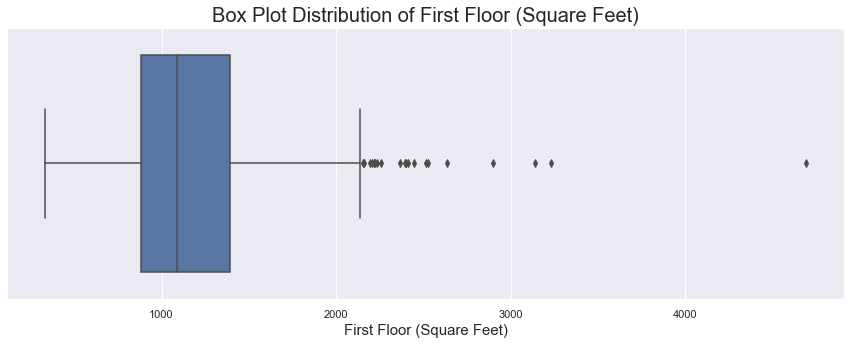

In [131]:
plot_box_plot_from_series(data=raw_data['1stFlrSF'],
                          plot_title='Box Plot Distribution of First Floor (Square Feet)', 
                          x_axis_label='First Floor (Square Feet)')

### 3.44 Second floor square feet

In [138]:
raw_data['2ndFlrSF'].isna().sum()

0

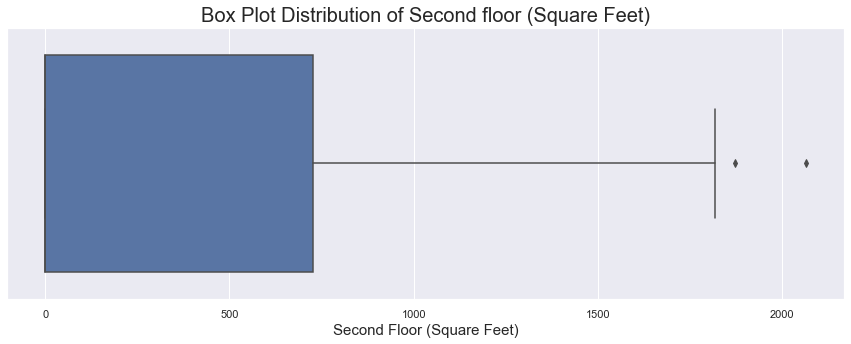

In [150]:
plot_box_plot_from_series(data=raw_data['2ndFlrSF'],
                          plot_title='Box Plot Distribution of Second floor (Square Feet)', 
                          x_axis_label='Second Floor (Square Feet)')

### 3.45 Low quality Finished square feet (all floors)

In [151]:
raw_data['LowQualFinSF'].isna().sum()

0

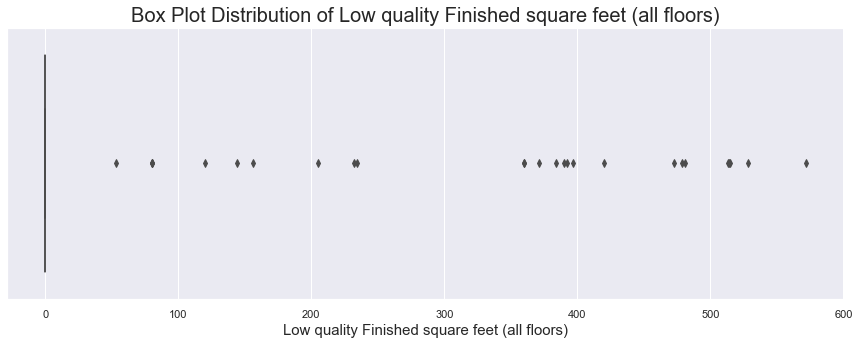

In [152]:
plot_box_plot_from_series(data=raw_data['LowQualFinSF'],
                          plot_title='Box Plot Distribution of Low quality Finished square feet (all floors)', 
                          x_axis_label='Low quality Finished square feet (all floors)')

### 3.46 Above grade (ground) living area square feet

In [153]:
raw_data.GrLivArea.isna().sum()

0

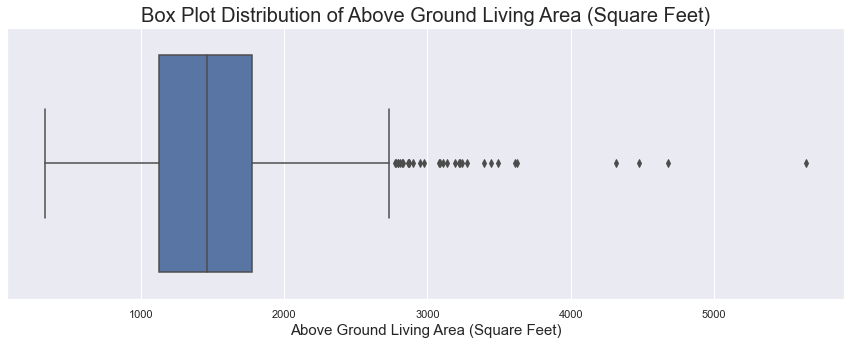

In [154]:
plot_box_plot_from_series(data=raw_data.GrLivArea,
                          plot_title='Box Plot Distribution of Above Ground Living Area (Square Feet)', 
                          x_axis_label='Above Ground Living Area (Square Feet)')

### 3.47 Basement full bathrooms

In [155]:
raw_data['BsmtFullBath'].isna().sum()

0

In [156]:
base_bath_full_df = raw_data.BsmtFullBath.value_counts(sort=False)
base_bath_full_df

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

### 3.48 Basement half bathrooms

In [159]:
raw_data.BsmtHalfBath.isna().sum()

0

In [160]:
base_bath_half_df = raw_data.BsmtHalfBath.value_counts(sort=False)
base_bath_half_df

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

### 3.49 Full bathrooms above grade

In [161]:
raw_data.FullBath.isna().sum()

0

In [162]:
full_bath_df = raw_data.FullBath.value_counts(sort=False)
full_bath_df

0      9
1    650
2    768
3     33
Name: FullBath, dtype: int64

### 3.50 Half baths above grade

In [163]:
raw_data.HalfBath.isna().sum()

0

In [164]:
half_bath_df = raw_data.HalfBath.value_counts(sort=False)
half_bath_df

0    913
1    535
2     12
Name: HalfBath, dtype: int64

### 3.51 Bedrooms above grade (does NOT include basement bedrooms)

In [166]:
raw_data.BedroomAbvGr.isna().sum()

0

In [167]:
bed_above_ground_df = raw_data.BedroomAbvGr.value_counts(sort=False)
bed_above_ground_df

0      6
1     50
2    358
3    804
4    213
5     21
6      7
8      1
Name: BedroomAbvGr, dtype: int64

### 3.52 Kitchens above grade

In [168]:
raw_data.KitchenAbvGr.isna().sum()

0

In [169]:
kit_above_ground_df = raw_data.KitchenAbvGr.value_counts(sort=False)
kit_above_ground_df

0       1
1    1392
2      65
3       2
Name: KitchenAbvGr, dtype: int64